<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Pr%C3%A1ctica%204%3A%20algoritmo%20de%20Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PON TU NOMBRE AQUÍ**

---

# Práctica 4: algoritmo de Simon

Implementa en Qiskit el algoritmo de Simon para un $n$ y un $c$ arbitrario y el oráculo simple que hemos visto.

Empieza implementando el oráculo como una puerta.

Para probarlo, supón $n=3$ y $c$ un valor aleatorio en el intervalo $[0,7]$. Obtén el valor de $c$ a partir de la salida del algoritmo.

In [2]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a6112653d3401c8c4760a0127ea4e967601f33916518f3ef6593c37ec3d3dd32
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [90]:
import numpy as np
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import Counts


def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

def obten_unitaria(qcirc, etiqueta):
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

In [125]:
def simon_oraculo(n, s):

    x = QuantumRegister(n, name="|x\\rangle")
    ancilla = QuantumRegister(n, name="|ancilla\\rangle")
    meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x, ancilla, meas)

    s = s[::-1]
    qc.cx(x,ancilla)

    if(s != 0):
      for i in range(n):
          if s[i] == '1':
              qc.cx(i,  ancilla[i])

    qc.barrier()
    qc.measure(ancilla, meas)
    qc.barrier()

    return qc

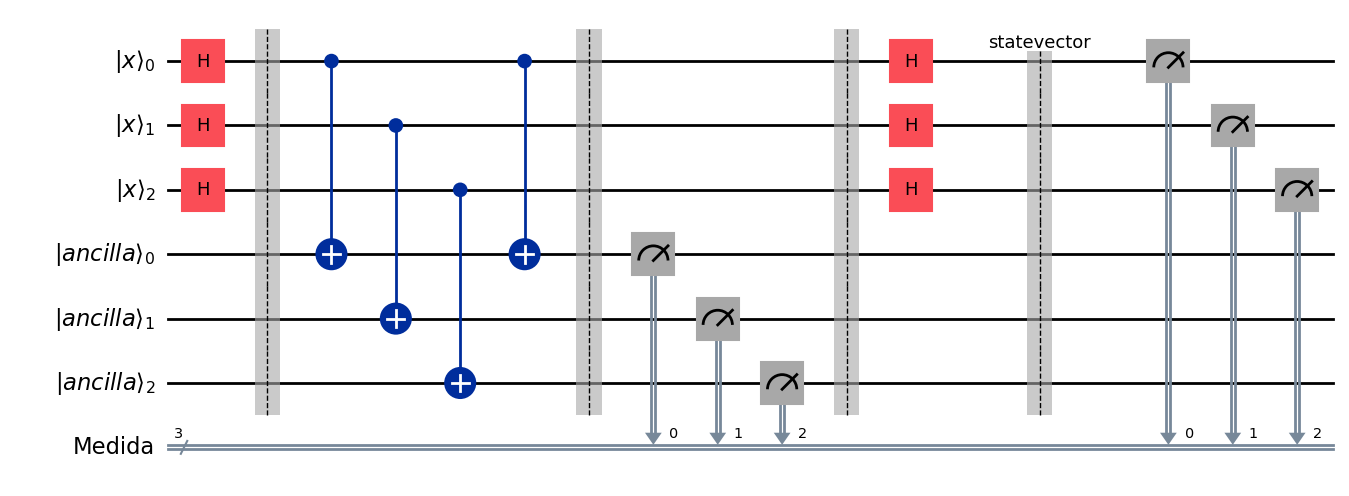

In [126]:
def algoritmo_Simon(n, s):
    x = QuantumRegister(n, name="|x\\rangle")
    ancilla = QuantumRegister(n, name="|ancilla\\rangle")
    meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x, ancilla, meas)

    qc.h(range(n))

    qc.barrier()
    qc = qc.compose(simon_oraculo(n, s))


    qc.h(range(n))
    qc.save_statevector()
    qc.measure(range(n), meas)

    return qc

n = 3
s = '001'
prueba = algoritmo_Simon(n, s)
#prueba.save_statevector()
prueba.draw('mpl')


In [127]:
obten_estado(qc, etiqueta="|\psi\!\!> = ", bloch=False)

<IPython.core.display.Latex object>

The secret value is :  001


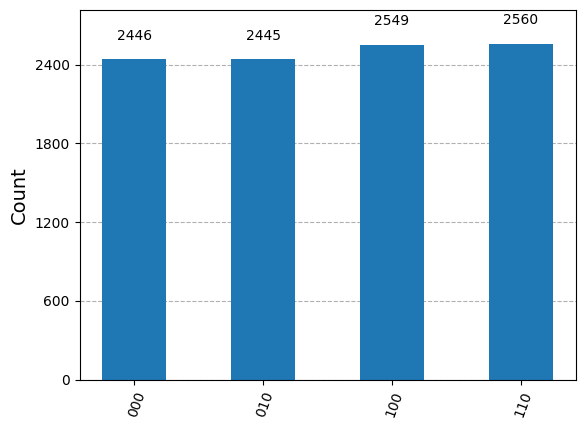

In [128]:
sim = AerSimulator(method='automatic')
n = 3
s = '001'

print("The secret value is : " , s)
x_to_salida_map = {}
salida2 = []

qc = algoritmo_Simon(n, s)
sim = AerSimulator(method='automatic')
qc_obj = transpile(qc, sim)
result = sim.run(qc_obj, shots = 10000).result()
salida = result.get_counts()
plot_histogram(salida)



# Si resolvemos el sistema de ecuaciones manualmente vemos que en todos los casos se recuperar c

In [122]:
salida2 = np.array(list(salida.keys()))
array_listas = [[int(bit) for bit in string] for string in salida2]
print(array_listas)

[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]


--------------------
-------------------
------------------